<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/Stock_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 33.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
apple = yf.Ticker("APPL")
amazon = yf.Ticker("AMZN")
tesla = yf.Ticker("TSLA")
microsoft = yf.Ticker("MSFT")
google = yf.Ticker("GOOG")


In [ ]:
#print(apple.info)
df = yf.download("AAPL", start = "2020-1-1", end="2021-11-30")
#print(df.head)



[*********************100%***********************]  1 of 1 completed


In [ ]:
print(df.tail)

<bound method NDFrame.tail of                   Open        High  ...   Adj Close     Volume
Date                                ...                       
2020-01-02   74.059998   75.150002  ...   73.988472  135480400
2020-01-03   74.287498   75.144997  ...   73.269157  146322800
2020-01-06   73.447502   74.989998  ...   73.852989  118387200
2020-01-07   74.959999   75.224998  ...   73.505638  108872000
2020-01-08   74.290001   76.110001  ...   74.688072  132079200
...                ...         ...  ...         ...        ...
2021-11-22  161.679993  165.699997  ...  161.020004  117467900
2021-11-23  161.119995  161.800003  ...  161.410004   96041900
2021-11-24  160.750000  162.139999  ...  161.940002   69463600
2021-11-26  159.570007  160.449997  ...  156.809998   76959800
2021-11-29  159.369995  161.190002  ...  160.240005   88748200

[482 rows x 6 columns]>


In [ ]:
df.head()
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [31]:
adj_close= df['Adj Close']
adj_close.tail()

Date
2021-11-22    161.020004
2021-11-23    161.410004
2021-11-24    161.940002
2021-11-26    156.809998
2021-11-29    160.240005
Name: Adj Close, dtype: float64

In [ ]:
returns = adj_close.pct_change()

print(len(returns))
returns.head()

482


Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: Adj Close, dtype: float64

In [22]:
returns

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2021-11-22    0.002927
2021-11-23    0.002422
2021-11-24    0.003284
2021-11-26   -0.031678
2021-11-29    0.021874
Name: Adj Close, Length: 482, dtype: float64

In [24]:
returns
df_new = returns[1:482]
df_new

Date
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2021-11-22    0.002927
2021-11-23    0.002422
2021-11-24    0.003284
2021-11-26   -0.031678
2021-11-29    0.021874
Name: Adj Close, Length: 481, dtype: float64

In [30]:
last_price = adj_close[-1]
last_price

160.24000549316406

In [75]:
num_simulations = 10000
num_days = 252
simulation_df = pd.DataFrame()

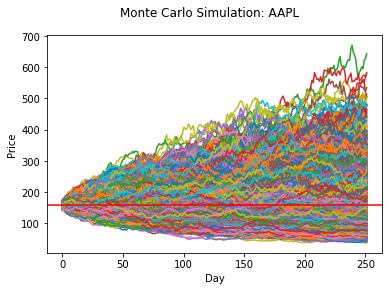

In [76]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()
# code copied from/ inspired by youtube channel "codebliss"

In [77]:
simulation_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,158.091451,159.150007,155.675380,166.212725,154.929209,156.078066,155.569181,155.732951,159.650033,157.115252,162.204964,155.782560,160.398753,156.265508,161.279367,156.373312,160.820682,158.387545,165.997782,161.789611,148.000777,157.568230,161.264407,161.157628,156.430214,164.319081,162.330634,160.105809,159.790772,158.821200,152.273157,158.414484,156.574814,157.465573,156.906657,163.743005,163.643066,151.399998,163.087167,158.023189,...,164.091633,159.719837,154.176861,159.424642,157.447423,163.205979,161.799647,168.217618,161.728307,158.095538,161.474414,159.014109,164.605357,155.777845,156.156095,164.666661,164.087256,156.681094,163.304344,159.701471,157.775180,157.216821,165.289607,157.205710,159.454818,166.640776,160.261526,159.784431,161.324477,164.409363,161.484637,161.331657,162.034341,157.083493,160.024640,168.110556,152.345282,170.697877,162.998598,157.368512
1,154.447602,156.915886,155.565099,159.566154,156.022017,159.015345,160.294390,149.297958,158.334240,160.876574,160.703823,156.183693,164.964219,151.601191,161.944922,155.012533,163.011944,166.067929,171.589014,165.948021,151.112698,155.855593,164.913797,159.829018,157.030263,163.099774,166.032215,155.300117,160.379992,163.083870,152.407315,160.046420,159.990722,155.737843,151.878555,160.451778,171.077299,151.613631,160.135148,163.077700,...,162.183819,158.574573,153.510712,163.271687,157.357711,159.330573,152.706683,161.499070,155.230107,153.813816,156.035757,150.928123,158.146957,156.884659,149.313057,159.908214,161.880039,160.365635,166.118588,166.721124,162.666960,160.352741,163.469982,157.026848,164.292797,163.731219,163.558758,155.852108,161.437039,166.585431,155.940729,157.995420,160.895886,163.936333,160.184208,170.223119,142.236608,169.271265,161.653357,161.859357
2,149.943908,157.299650,156.666874,163.026486,155.129059,160.695673,162.478769,148.605679,164.224417,160.900363,161.073906,155.242371,161.658371,146.272154,161.193446,155.911223,162.808324,169.943843,171.642123,165.707009,154.101937,160.206870,170.035461,158.197488,157.162733,162.830343,161.862797,158.840822,166.167607,156.642373,153.641994,155.875987,162.467420,155.539176,149.935865,160.929256,172.914290,146.979921,153.309750,164.526299,...,163.719919,160.496915,146.240274,161.528371,154.807476,164.576233,149.682677,159.048919,154.517543,149.637877,162.523896,151.241347,155.459095,159.275198,147.251207,158.234258,164.855469,164.834936,165.448775,165.246071,160.242564,162.043398,167.356608,154.728587,164.749483,168.369689,162.329172,158.540159,166.742986,169.116867,156.212256,152.421722,164.018016,157.870991,160.129855,166.763420,141.548630,165.878315,167.134258,160.867084
3,151.814817,154.796754,159.857832,161.582502,156.921234,158.977485,160.750941,151.730981,162.416713,159.380215,159.289145,157.093008,164.372137,144.011311,167.513764,159.766381,163.433015,166.743287,172.601861,159.907883,154.108870,163.820052,169.637992,155.959674,156.445269,160.921458,160.257056,166.860585,165.475536,162.847397,155.966240,154.743686,163.021942,153.113909,152.624027,161.845843,167.070851,146.270875,154.779702,167.718900,...,156.883249,159.644936,147.481294,168.528429,150.331619,166.733541,151.770922,160.545340,156.442432,152.709881,163.862081,143.841521,159.897025,158.171868,149.819322,156.453163,170.706811,172.709851,158.194529,159.914465,156.056431,159.389838,170.094491,151.869675,161.354385,172.265718,160.735125,162.781106,161.532992,170.796533,157.360270,158.083533,154.529820,157.025319,157.371823,163.953147,142.351952,161.787054,167.758518,158.946287
4,143.701680,160.952744,163.011379,165.005805,155.770440,162.465379,162.776382,144.948564,159.642606,163.047665,157.912032,156.495690,162.217

In [78]:
final = simulation_df.iloc[-1]
final

0        82.293624
1       213.096321
2       144.329821
3       214.110462
4       177.678983
           ...    
9995    100.028764
9996    105.084705
9997    125.412250
9998    147.978801
9999    223.389900
Name: 251, Length: 10000, dtype: float64

In [79]:
final.max()

642.8937457059103

In [80]:
final.min()

37.45353564519054

(array([4.740e+02, 2.328e+03, 2.887e+03, 2.029e+03, 1.210e+03, 6.060e+02,
        2.630e+02, 1.050e+02, 5.600e+01, 3.000e+01, 7.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 40,  80, 120, 160, 200, 240, 280, 320, 360, 400, 480, 520, 560,
        600, 640, 680]),
 <a list of 15 Patch objects>)

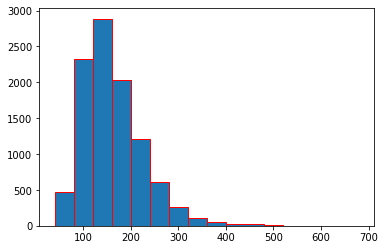

In [83]:
#bins_desired = [0,80,160,240,320,400,480,560,640,720]
bins_desired = [40,80,120,160,200,240,280,320,360,400,480, 520, 560, 600, 640, 680]

plt.hist(final, bins = bins_desired, edgecolor = 'red')

In [87]:
counter_less140 = final[final<last_price]
counter_less140
prob = len(counter_less140) / num_simulations 
print(prob)

0.5715


In [85]:
last_price* 1.02

163.44480560302733